In [1]:
# % matplotlib notebook

In [2]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Set path for city file
city_csvfile = os.path.join("city_data.csv")
print (city_csvfile)

#Set path for ride file
ride_csvfile = os.path.join("ride_data.csv")
print(ride_csvfile)



city_data.csv
ride_data.csv


In [4]:
# Read city file
city_csvfile_pd = pd.read_csv(city_csvfile)
city_csvfile_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Read ride file
ride_csvfile_pd = pd.read_csv(ride_csvfile)
ride_csvfile_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#List all columns in city file
ride_csvfile_pd.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [7]:
#List all columns in ride file
ride_csvfile_pd.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [8]:
# Combine the data into a single dataset
# Display the new data table with city and ride data for preview

cityride_joinedfile = pd.merge(ride_csvfile_pd, city_csvfile_pd, on='city', how='left')
cityride_joinedfile.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
cityride_joinedfile.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [10]:
city = cityride_joinedfile["type"].value_counts()
city.head(5)

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Build the scatter plots for each city types

In [11]:
# Filtering dataframe for city types
urban_df = cityride_joinedfile[cityride_joinedfile["type"] == "Urban"]
suburban_df = cityride_joinedfile[cityride_joinedfile["type"] == "Suburban"]
rural_df = cityride_joinedfile[cityride_joinedfile["type"] == "Rural"]



In [12]:
#Calculate average fare per city
avg_urban_fare = urban_df.groupby("city").mean()["fare"]
avg_suburban_fare = suburban_df.groupby("city").mean()["fare"]
avg_rural_fare = rural_df.groupby("city").mean()["fare"]

#Calculate total number of rides per city
total_urban_rides = urban_df.groupby("city").count()["ride_id"]
total_suburban_rides = suburban_df.groupby("city").count()["ride_id"]
total_rural_rides = rural_df.groupby("city").count()["ride_id"]

#Caluculate total number of drivers per city
total_urban_drivers = urban_df.groupby("city").mean()["driver_count"]
total_suburban_drivers = suburban_df.groupby("city").mean()["driver_count"]
total_rural_drivers = rural_df.groupby("city").mean()["driver_count"]


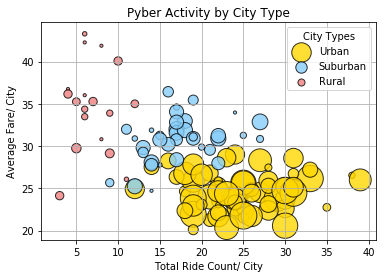

In [23]:
# Create scatter plots for all three city types
# Obtain the x and y coordinates for each of the three city types; 
# x axis is total number rides/city; y axis is average fare; 
# size is driver count per city; color is city type

# Urban plot
plt.scatter(total_urban_rides, avg_urban_fare, s=10*total_urban_drivers, 
            c='gold', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="Urban")

# Suburban plot
plt.scatter(total_suburban_rides, avg_suburban_fare, s=10*total_suburban_drivers, 
            c='lightskyblue', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="Suburban")

# Rural plot
plt.scatter(total_rural_rides, avg_rural_fare, s=10*total_rural_drivers, 
            c='lightcoral', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="Rural")

# Plot labels and formatting
plt.title("Pyber Activity by City Type")
plt.xlabel("Total Ride Count/ City")
plt.ylabel("Average Fare/ City")
plt.legend(loc='best', title='City Types')
plt.grid()


In [15]:
# Save Figure
plt.savefig("Avg_Fare_City_scatter.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [16]:
cityride_joinedfile.columns


Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [17]:
#Total Fares by City Type = sizes
city_type_fares = cityride_joinedfile.groupby("type").sum()["fare"]
city_type_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

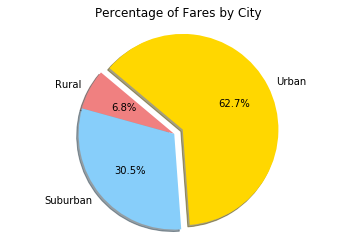

In [27]:
# City type fares pie data
sizes = (4327.93, 19356.33, 39854.38)
labels = ("Rural","Suburban","Urban")
explode = (0,0,0.1)
colors = ("lightcoral","lightskyblue","gold")

# Build Pie Chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Fares by City")

# Create axes which are equal for a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("City_Fares_pie.png")




In [29]:
 # Total Rides by City Type
total_fares_city = cityride_joinedfile.groupby("type").count()["ride_id"]
total_fares_city.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

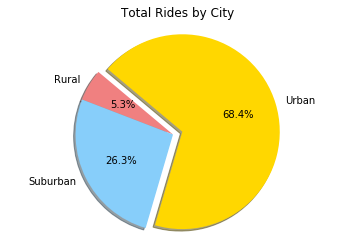

In [30]:
# Total rides by city type pie data
sizes = (125, 625, 1625)
labels = ("Rural","Suburban","Urban")
explode = (0,0,0.1)
colors = ("lightcoral","lightskyblue","gold")

# Build Pie Chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Total Rides by City")

# Create axes which are equal for a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("Total_Rides_pie.png")

In [32]:
#  Total Drivers by City Type
total_drivers_city = cityride_joinedfile.groupby("type").sum()["driver_count"]
total_drivers_city.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

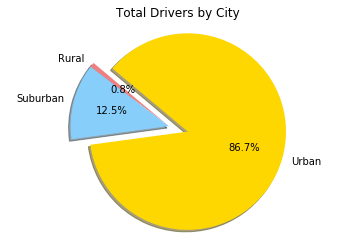

In [36]:
# Total drivers by city type pie data
sizes = (537, 8570, 59602)
labels = ("Rural","Suburban","Urban")
explode = (0,0,0.2)
colors = ("lightcoral","lightskyblue","gold")

# Build Pie Chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, shadow=True, autopct="%1.1f%%", startangle=140)
plt.title("Total Drivers by City")

# Create axes which are equal for a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("Total_Drivers_pie.png")

# Observations

1) Scatter Plot: 
- most urban drivers will provide 20-30 rides averaging $20-$25/ride; 
- suburban drivers will provide 15-20 rides averaging $30-$35/ride; 
- rural drivers will average 5 rides at $35/ride

The location affects the average ride rate. Rides are at least $15 more if you are located in a rural area.

Pie Charts:
2)Urban areas have the highest ride sharing activity and the activity decreases the further out you are. However, there are more drivers, 18% more, than there is business in urban areas. The supply of drivers in suburban and rural areas isn't adequate to meet the demand of drivers and can only meet 50% of the ride sharing need in these areas. 

3)Drivers that want to maximize their drive time will want to flex and provide ride share services in suburban and rural areas during peak demand hours due to more competition for business in urban settings.